빈도분석,

*   코로나->인구이동에 영향
*   2020년에는 왜 인구이동증가

개선점

1.   일수대로 확진자 측정하다보니 그래프를 그릴때 행을 그저 세는 걸로 카운트된다(즉 달의 일수 2월이면 28, 7월 8월은 31일 이렇게만 그려진다)
2.   항목 추가






In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* read_csv()함수로 file변수에 저장해라

In [ ]:
file=pd.read_csv('/content/drive/MyDrive/DALC_Scalar/(성북구) 서울생활인구 일별 집계표.csv',header=None,encoding='euc-kr')
file

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,기준일ID,시군구코드,시군구명,총생활인구수,내국인생활인구수,장기체류외국인인구수,단기체류외국인인구수,일최대인구수,일최소인구수,주간인구수(09~18),야간인구수(19~08),일최대이동인구수,서울외유입인구수,동일자치구행정동간이동인구수,자치구간이동인구수
1,20210425,11290,성북구,443639.45680,426291.84200,14728.45920,2619.15560,465470.80920,416126.41780,427753.49210,454986.57450,168361.07380,20646.80240,91937.32060,55776.95080
2,20210424,11290,성북구,437840.32410,421201.82570,14711.10870,1927.38980,459598.45900,408104.13620,418491.12470,451661.18080,173192.06950,22332.52960,88407.36780,62452.17210
3,20210423,11290,성북구,435185.36780,418784.71860,14991.80530,1408.84390,465491.92740,400532.96140,408959.39910,453918.20260,192984.50380,22768.37600,93289.93880,76926.18900
4,20210422,11290,성북구,438600.35210,421482.46410,15150.64420,1967.24380,467918.04400,404219.35790,411963.45150,457626.70970,197478.01740,23795.99210,94515.73460,79166.29070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,20180409,11290,성북구,476114.24590,454886.10310,18788.06680,2440.07600,504092.62350,450264.16860,453415.34120,492327.74920,240497.63390,30769.73320,103022.83580,106705.06490
1099,20180408,11290,성북구,477840.49290,456999.13760,18226.85170,2614.50360,498844.12240,450066.63510,461373.95650,489602.30450,193289.26080,24703.28610,98189.04260,70396.93210
1100,20180407,11290,성북구,466144.52940,445674.45040,17855.15440,2614.92470,497224.81540,432109.66880,442971.58690,482696.63120,196216.04810,26331.93420,95319.36890,74564.74500
1101,20180406,11290,성북구,469243.02000,448371.16010,18446.62860,2425.23130,504288.05870,438023.86400,444779.46070,486716.99090,226138.30080,27578.37090,99137.54820,99422.38170


In [ ]:
file=file.drop([2],axis=1)
file=file.drop([0],axis=0)
file.columns=['기준일ID', '시군구코드', '총생활인구수', '내국인생활인구수', '장기체류외국인인구수', '단기체류외국인인구수', '일최대인구수', '일최소인구수', '주간인구수', '야간인구수', '일최대이동인구수', '서울외유입인구수', '동일자치구행정동간이동인구수', '자치구간이동인구수']

In [ ]:
p_file=file.astype(np.float)
p_file[['기준일ID', '시군구코드']] = p_file[['기준일ID', '시군구코드']].astype(str)

In [ ]:
p_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 1 to 1102
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   기준일ID           1102 non-null   object 
 1   시군구코드           1102 non-null   object 
 2   총생활인구수          1102 non-null   float64
 3   내국인생활인구수        1102 non-null   float64
 4   장기체류외국인인구수      1102 non-null   float64
 5   단기체류외국인인구수      1102 non-null   float64
 6   일최대인구수          1102 non-null   float64
 7   일최소인구수          1102 non-null   float64
 8   주간인구수           1102 non-null   float64
 9   야간인구수           1102 non-null   float64
 10  일최대이동인구수        1102 non-null   float64
 11  서울외유입인구수        1102 non-null   float64
 12  동일자치구행정동간이동인구수  1102 non-null   float64
 13  자치구간이동인구수       1102 non-null   float64
dtypes: float64(12), object(2)
memory usage: 129.1+ KB


* 데이터프레임 file의 앞에 5줄 데이터 조회

In [ ]:
print(p_file.head())

        기준일ID    시군구코드       총생활인구수  ...    서울외유입인구수  동일자치구행정동간이동인구수   자치구간이동인구수
1  20210425.0  11290.0  443639.4568  ...  20646.8024      91937.3206  55776.9508
2  20210424.0  11290.0  437840.3241  ...  22332.5296      88407.3678  62452.1721
3  20210423.0  11290.0  435185.3678  ...  22768.3760      93289.9388  76926.1890
4  20210422.0  11290.0  438600.3521  ...  23795.9921      94515.7346  79166.2907
5  20210421.0  11290.0  439620.8259  ...  24139.0040      95286.4855  80989.7148

[5 rows x 14 columns]


#  데이터 요약정보 확인하기

* 데이터프레임 모양과 크기 확인

In [ ]:
print(p_file.shape)

(1102, 14)


* 데이터프레임 기본정보 조회

In [ ]:
#### `2020,2021 인구이동` 데이터를 `month`, `day` 데이터로 나누기

In [ ]:
# dataframe에 추가하기 전, 임시로 데이터를 저장해 둘 list를 선언합니다.
year=[]
month = []
day = []

for data in p_file['기준일ID']:
    # split 함수를 사용하여 월, 일을 나누어 list에 저장합니다.
    year.append(data[:4])
    month.append(data[4:6])
    day.append(data[6:8])

In [ ]:
# corona_del_col에 `month`, `day` column을 생성하며 동시에 list에 임시 저장된 데이터를 입력합니다.
#month.lstrip('0')
p_file['year']=year
p_file['month'] = month
p_file['day'] = day

p_file['year'].astype('int64')
p_file['month'].astype('int64')
p_file['day'].astype('int64')

1       25
2       24
3       23
4       22
5       21
        ..
1098     9
1099     8
1100     7
1101     6
1102     5
Name: day, Length: 1102, dtype: int64

In [ ]:
cop_file=p_file[(p_file['year']=='2021')|(p_file['year']=='2020')]
cop_file

,기준일ID,시군구코드,총생활인구수,내국인생활인구수,장기체류외국인인구수,단기체류외국인인구수,일최대인구수,일최소인구수,주간인구수,야간인구수,일최대이동인구수,서울외유입인구수,동일자치구행정동간이동인구수,자치구간이동인구수,year,month,day
1,20210425.0,11290.0,443639.4568,426291.8420,14728.4592,2619.1556,465470.8092,416126.4178,427753.4921,454986.5745,168361.0738,20646.8024,91937.3206,55776.9508,2021,04,25
2,20210424.0,11290.0,437840.3241,421201.8257,14711.1087,1927.3898,459598.4590,408104.1362,418491.1247,451661.1808,173192.0695,22332.5296,88407.3678,62452.1721,2021,04,24
3,20210423.0,11290.0,435185.3678,418784.7186,14991.8053,1408.8439,465491.9274,400532.9614,408959.3991,453918.2026,192984.5038,22768.3760,93289.9388,76926.1890,2021,04,23
4,20210422.0,11290.0,438600.3521,421482.4641,15150.6442,1967.2438,467918.0440,404219.3579,411963.4515,457626.7097,197478.0174,23795.9921,94515.7346,79166.2907,2021,04,22
5,20210421.0,11290.0,439620.8259,422390.0016,15306.6016,1924.2227,466788.5440,406764.8845,413694.9640,458139.2987,200415.2043,24139.0040,95286.4855,80989.7148,2021,04,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,20200105.0,11290.0,463906.9084,445593.4792,14705.3683,3608.0608,479363.9840,437018.9790,449600.5964,474125.7027,177104.1110,25074.3493,91078.7494,60951.0123,2020,01,05
478,20200104.0,11290.0,453925.3715,435996.2355,14482.8877,3446.2484,476649.3520,423055.3746,434647.1356,467695.5400,177337.9134,24377.2061,88228.5988,64732.1085,2020,01,04
479,20200103.0,11290.0,441661.9324,423619.9581,14602.3433,3439.6310,477758.9371,403933.3626,411656.4945,463094.3880,191801.0290,23877.5062,91241.2087,76682.3141,2020,01,03
480,20200102.0,11290.0,444027.1692,425772.4629,14991.6435,3263.0629,478624.5213,405209.2438,413300.0467,465975.1139,192104.9968,24019.9415,91561.4904,76523.5649,2020,01,02


* 데이터프레임의 기술통계정보를 보여라

In [ ]:
cop_file.describe()

,총생활인구수,내국인생활인구수,장기체류외국인인구수,단기체류외국인인구수,일최대인구수,일최소인구수,주간인구수,야간인구수,일최대이동인구수,서울외유입인구수,동일자치구행정동간이동인구수,자치구간이동인구수
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,444860.304153,426588.084024,15136.461702,3135.758434,469827.379027,414925.034548,422722.706902,460672.873619,180428.078962,22480.439527,89669.210199,68278.429236
std,8105.961294,7820.584467,909.449815,1180.674527,7691.013562,12390.575920,12505.370290,7229.522782,12281.977557,3265.838049,3312.203372,8756.988787
min,418184.724500,399891.785100,11442.411400,1049.793800,430555.550000,388969.653100,397151.413800,426720.783600,148369.859000,15158.955900,70532.244100,47163.712600
25%,438772.468000,421278.544400,14704.530600,2240.652000,464979.652900,405921.493000,413604.547500,455876.737700,171251.861900,20593.819800,87898.922300,60832.967200
50%,444167.019600,425781.177300,15407.681600,2859.708200,470232.262300,412472.303600,419690.065900,460870.503800,182442.498400,22187.463400,89895.042300,70792.289800
75%,450328.108500,431539.388400,15754.003500,3709.097400,475807.418900,420790.197900,429174.759800,465975.113900,190889.078700,23938.930500,91892.117500,75291.429600
max,472456.381700,453223.716900,16934.108800,7503.387500,496840.973900,460228.602400,466441.677100,476752.599300,202056.204500,55184.595600,98316.718600,80989.714800


* 월별'일최대이동인구수' 등수확인

In [ ]:
month_data=pd.DataFrame(data=cop_file.groupby(['month'])['일최대이동인구수'].mean())
month_data['rank']=month_data['일최대이동인구수'].rank(method='dense', ascending=False)
month_data.sort_values(by='rank')
#6월이 일최대이동인구수가 가장 많다

,일최대이동인구수,rank
month,,
06,187020.203820,1.0
04,184966.880489,2.0
10,184485.501994,3.0
05,184452.070406,4.0
11,184116.763027,5.0
01,181236.038376,6.0
07,180389.486958,7.0
02,179413.734395,8.0
03,178372.197632,9.0


# 통계함수

* 2020~2021 file데이터프레임의 평균값 계산

In [ ]:
cop_file.mean()

총생활인구수            4.448603e+05
내국인생활인구수          4.265881e+05
장기체류외국인인구수        1.513646e+04
단기체류외국인인구수        3.135758e+03
일최대인구수            4.698274e+05
일최소인구수            4.149250e+05
주간인구수             4.227227e+05
야간인구수             4.606729e+05
일최대이동인구수          1.804281e+05
서울외유입인구수          2.248044e+04
동일자치구행정동간이동인구수    8.966921e+04
자치구간이동인구수         6.827843e+04
year                       inf
month                      inf
day                        inf
dtype: float64

* '자치구간이동인구수'와 '일최대이동인구수'의 상관계수를 계산

In [ ]:
p_file[['자치구간이동인구수','일최대이동인구수']].corr()

,자치구간이동인구수,일최대이동인구수
자치구간이동인구수,1.000000,0.973829
일최대이동인구수,0.973829,1.000000


# Pandas 심화(2)
* 판다스 내장 그래픽 활용
* 중복 데이터 처리

* matplotlib라이브러리호출 (mpl로 약칭)

In [ ]:
import matplotlib as mpl

* matplotlib라이브러리의 pyplot함수 호출 (plt로 약칭)

In [ ]:
import matplotlib.pyplot as plt

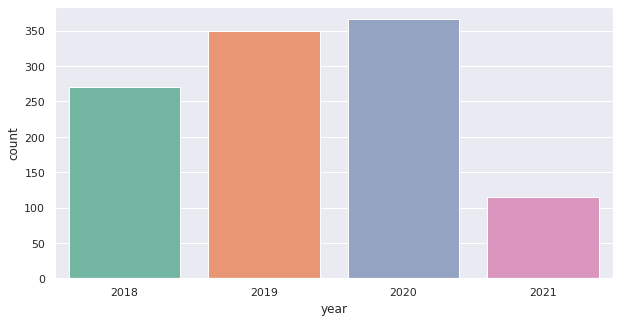

In [ ]:
# 그래프의 사이즈를 조절합니다.
plt.figure(figsize=(10,5))
y_order = []
for i in range(2018,2022):
    y_order.append(str(i))

y_order
# seaborn의 countplot 함수를 사용하여 출력합니다.
sns.set(style="darkgrid")
ax = sns.countplot(x='year', data=p_file[["일최대이동인구수","year"]], palette="Set2",order=y_order)

[(25.0, 32.0)]

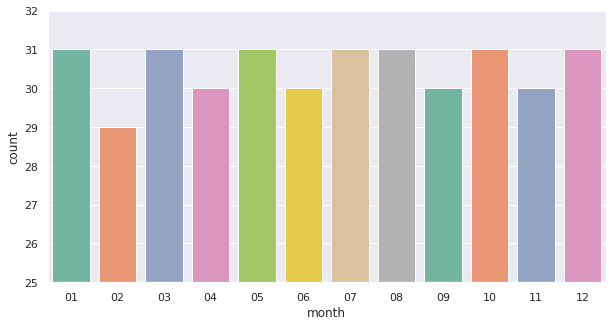

In [ ]:
# 그래프의 사이즈를 조절합니다.
plt.figure(figsize=(10,5))
p_file_2020=p_file[p_file['year']=='2020'].sort_values(by='month')
# seaborn의 countplot 함수를 사용하여 출력합니다.
sns.set(style="darkgrid")
ax = sns.countplot(x="month", data=p_file_2020[["일최대이동인구수","month"]], palette="Set2")
ax.set(ylim=(25,32))

[(25.0, 32.0)]

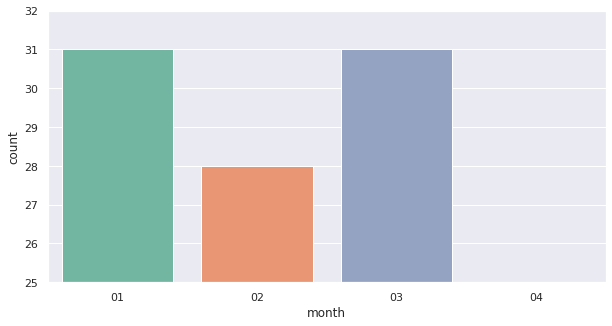

In [ ]:
# 그래프의 사이즈를 조절합니다.
plt.figure(figsize=(10,5))
p_file_2021=p_file[p_file['year']=='2021'].sort_values(by='month')
# seaborn의 countplot 함수를 사용하여 출력합니다.
sns.set(style="darkgrid")
ax = sns.countplot(x="month", data=p_file_2021, palette="Set2")
ax.set(ylim=(25,32))

[(0.8, 1.5)]

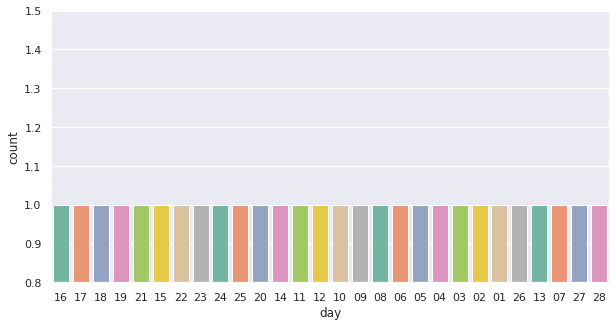

In [ ]:
# 그래프의 사이즈를 조절합니다.
plt.figure(figsize=(10,5))
# seaborn의 countplot 함수를 사용하여 출력합니다.
sns.set(style="darkgrid")
ax = sns.countplot(x="day", data=p_file_2021[p_file_2021['month']=='02'], palette="Set2")
ax.set(ylim=(0.8,1.5))

In [ ]:
# value_counts()는 각 데이터를 세어서 내림차순으로 정리하는 함수입니다.
p_file['day'].value_counts()

05    37
11    37
07    37
12    37
13    37
06    37
14    37
10    37
01    36
02    36
08    36
15    36
28    36
24    36
25    36
18    36
09    36
04    36
21    36
20    36
16    36
23    36
17    36
19    36
03    36
22    36
27    35
26    35
29    34
30    33
31    21
Name: day, dtype: int64

In [ ]:
order2 = []
for i in range(1,32):
    
    order2.append(str(i))

order2

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31']

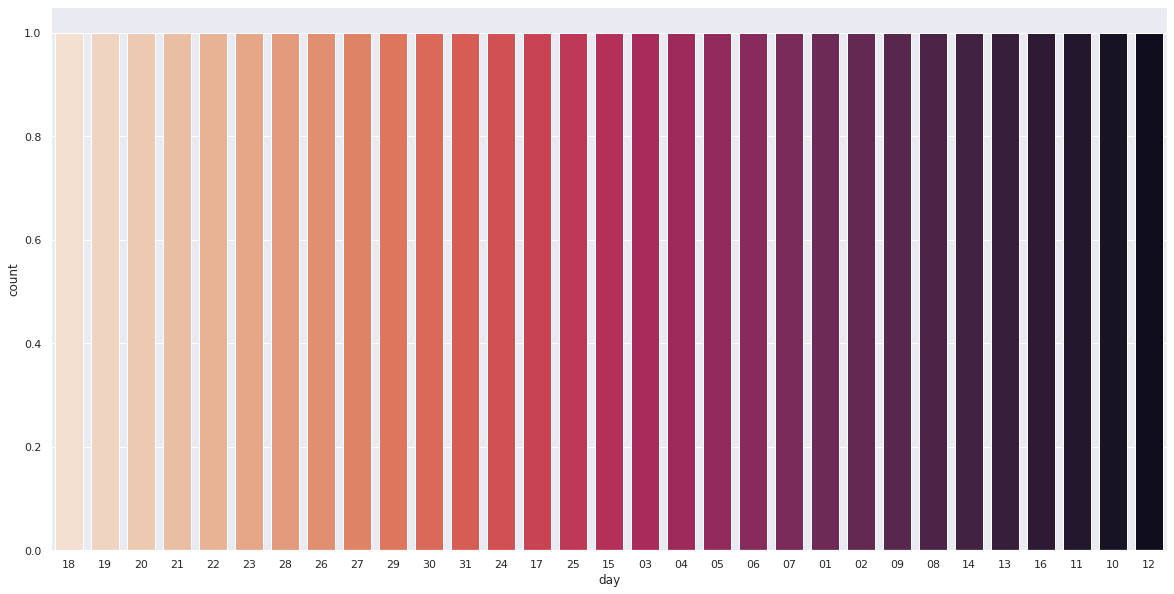

In [ ]:
# seaborn의 countplot 함수를 사용하여 출력합니다.
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="day", data=p_file_2020[p_file_2020['month'] == "08"], palette="rocket_r")

In [ ]:
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

In [ ]:
data=p_file.iloc[:,4:]
data

,장기체류외국인인구수,단기체류외국인인구수,일최대인구수,일최소인구수,주간인구수,야간인구수,일최대이동인구수,서울외유입인구수,동일자치구행정동간이동인구수,자치구간이동인구수,year,month,day
1,14728.4592,2619.1556,465470.8092,416126.4178,427753.4921,454986.5745,168361.0738,20646.8024,91937.3206,55776.9508,2021,04,25
2,14711.1087,1927.3898,459598.4590,408104.1362,418491.1247,451661.1808,173192.0695,22332.5296,88407.3678,62452.1721,2021,04,24
3,14991.8053,1408.8439,465491.9274,400532.9614,408959.3991,453918.2026,192984.5038,22768.3760,93289.9388,76926.1890,2021,04,23
4,15150.6442,1967.2438,467918.0440,404219.3579,411963.4515,457626.7097,197478.0174,23795.9921,94515.7346,79166.2907,2021,04,22
5,15306.6016,1924.2227,466788.5440,406764.8845,413694.9640,458139.2987,200415.2043,24139.0040,95286.4855,80989.7148,2021,04,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,18788.0668,2440.0760,504092.6235,450264.1686,453415.3412,492327.7492,240497.6339,30769.7332,103022.8358,106705.0649,2018,04,09
1099,18226.8517,2614.5036,498844.1224,450066.6351,461373.9565,489602.3045,193289.2608,24703.2861,98189.0426,70396.9321,2018,04,08
1100,17855.1544,2614.9247,497224.8154,432109.6688,442971.5869,482696.6312,196216.0481,26331.9342,95319.3689,74564.7450,2018,04,07
1101,18446.6286,2425.2313,504288.0587,438023.8640,444779.4607,486716.9909,226138.3008,27578.3709,99137.5482,99422.3817,2018,04,06


* data의 선그래프 그리기

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_

<Figure size 4320x5040 with 0 Axes>

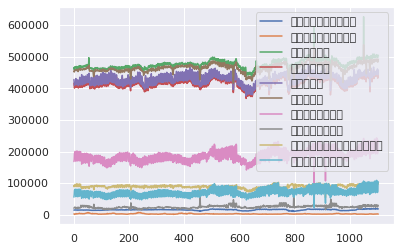

In [ ]:
plt.figure(figsize=(60,70))
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid');
data.plot();

* data의 히스토그램 그리기



/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_

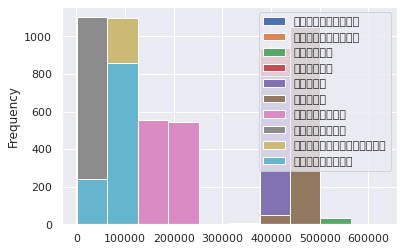

In [ ]:
data.plot(kind='hist');

* data의 자치구간이동인구수와 일최대이동인구수 산점도 그리기

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_

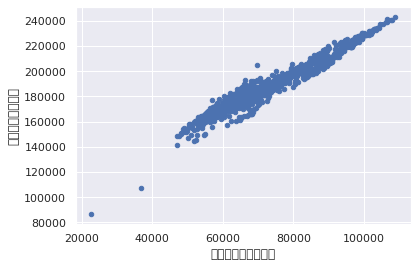

In [ ]:
data.plot(x='자치구간이동인구수',y='일최대이동인구수',kind='scatter')

* data의 자치구간이동인구수와 일최대이동인구수 박스플롯 그리기

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_

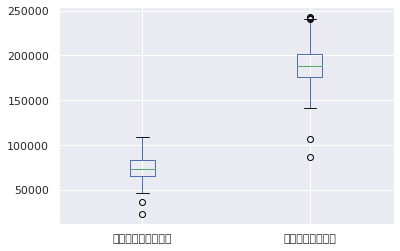

In [ ]:
data[['자치구간이동인구수','일최대이동인구수']].plot(kind='box')